# An Outline for the Tasks Ahead..

Before we begin solving any business problem that requires modelling of data, it is paramount that we complete the below checklist items (as part of a standard process regardless of the problem statement or/and domain):

- [ ] Business Requirements Gathering / Problem Identification (Background Information)
- [ ] Pre-requisites setup (Importing packages, etc.)
- [ ] Data source identification and access
- [ ] Exploratory Data Analysis
- [ ] Data Preparation
- [ ] Model Building & Evaluation
- [ ] Model Deployment

While the activities above are not exhaustive, they cover the core requirements of any data modelling exercise.

# Table of Contents: <a class="anchor" id="table-of-content"></a>
* [1. Problem Background and Motivation](#problem-background)
* [2. Libraries and Custom Functions](#import-packages)
* [3. Data Exploration/Prep](#data-prep)
* [4. Machine Learning Model](#ml-model)
* [5. Deployment of Model](#model-deployment)

# 1. Problem Background and Motivation <a class="anchor" id="problem-background"></a>

<img src='' width="700" />

### Problem Description
>- A large regional bank would like to automate their loan approval process to reduce costs, time for approval, and ambiguity (of the process). As a part of this goal, they want to build a machine learning solution that can use the data provided by customers to make a decision on whether the loan should be approved for an applicant or not. However, the data provided contains some information of applicants that cannot (legally) be used to make loan approval decisions and hence these need to be mandatorily excluded.

### Key Stakeholders
>- Loan Officers - This solution would be primarily geared towards loan officers, who can use the solution to (almost) instantly get a decision on whether an applicant's loan should be approved or not.

>- Bank Managers - Bank managers can use the solution as well to understand what kind of applicants tend to be approved (or not). In the hypothetical scenario where this solution replaces Loan Officers, the bank manager would be the primary stakeholder for this solution.

* [Go to Top](#table-of-content)

# 2. Libraries & Custom Functions <a class="anchor" id="import-packages"></a>
* [Go to Top](#table-of-content)

##### Libraries Import:
>- Pandas for data processing and transformation. Numpy for numerical functions
>- Seaborn, Matplotlib and Ploty for visual representations of data / function outputs
>- (Sklearn) Train_Test_Split to split our data into randomized train and test dataframes.
>- (Sklearn) LogisticRegression to implement a logistic regression model
>- (Sklearn) NearestNeighbors, KNeighborsClassifier to implement a KNN classification model
>- (Sklearn) Metrics to measure classification performance
>- Pickle to serialize our model object so that it can be used in Streamlit
>- Streamlit to deploy a GUI which can be used to interact with the model

##### Custom Functions:
>- Class_Perf_Measures - a function that takes the model object, X_test (which contains the test data predictor variables), Y_test (which contains the test data target variable) to calculate and display performance measures such as recall, precision, and confusion matrix metrics.

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.2f}'.format
import numpy as np

# Graphics
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# ML
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn import metrics

# Model Deployment
import pickle
import streamlit as st


# Custom function below is used to display performance measures
# Required inputs are the model name and the two test data objects (X,y)
def class_perf_measures(model,X_test,y_test):
    # Create empty lists to store metric values created within loop
    TP = []
    TN = []
    FP = []
    FN = []
    recall = []
    precision = []
    F1 = []
    Accuracy = []
    
    # Create list of probability threshold values to loop over
    threshold = np.arange(0,1.1,0.1).tolist()

    # Start loop
    for i in threshold:

        # Create class assignments given threshold value
        y_test_pred_class = (model.predict_proba(X_test)[:,1] >= i).astype(int)

        # Append lists with metric values
        TP.append(metrics.confusion_matrix(y_test, y_test_pred_class)[1,1])
        TN.append(metrics.confusion_matrix(y_test, y_test_pred_class)[0,0])
        FP.append(metrics.confusion_matrix(y_test, y_test_pred_class)[0,1])
        FN.append(metrics.confusion_matrix(y_test, y_test_pred_class)[1,0])
        recall.append(metrics.recall_score(y_test, y_test_pred_class).round(3))
        precision.append(metrics.precision_score(y_test, y_test_pred_class).round(3))
        F1.append(metrics.f1_score(y_test, y_test_pred_class).round(2))
        Accuracy.append(metrics.accuracy_score(y_test, y_test_pred_class).round(2))

    # Create dataframe
    result = pd.DataFrame({"threshold":threshold,
                           "TP":TP,
                           "TN":TN,
                           "FP":FP,
                           "FN":FN,
                           "Precision":precision,
                           "Recall":recall,
                           "F1":F1,
                           "Accuracy": Accuracy
                          })

    # Let's look at our dataframe
    return result

# 3. Data Exploration/Prep <a class="anchor" id="data-prep"></a>

- [ ] [Initial Evaluation](#initial-evaluation)
- [ ] [Initial Cleanup - dupes, missing values](#missing-values)
- [ ] [Outlier Detection & Treatment](#outliers)
- [ ] [Feature Selection](#feature-selection)
- [ ] [Data Partitioning](#data-split)
- [ ] [Data Normalization](#normalization)

[Go to Top of Notebook](#table-of-content)

> **Initial Evaluation** <a class="anchor" id="initial-evaluation"></a>

We read in the dataset (provided in CSV format) and look at the last 5 rows just to get a high level understanding of the kind of variables we are working with.

In [2]:
# We read the dataset that was provided to us
df = pd.read_csv('loan_approval.csv')
df.tail()

,approved,gender,age,debt,married,bank_customer,emp_industrial,emp_materials,emp_consumer_services,emp_healthcare,emp_financials,emp_utilities,emp_education,ethnicity_white,ethnicity_black,ethnicity_latino,ethnicity_asian,ethnicity_other,years_employed,prior_default,employed,credit_score,drivers_license,citizen_bybirth,citizen_other,citizen_temporary,Income
685,0,1,21.08,10.09,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1.25,0,0,0,0,1,0,0,0
686,0,0,22.67,0.75,1,1,1,0,0,0,0,0,0,1,0,0,0,0,2.00,0,1,2,1,1,0,0,394
687,0,0,25.25,13.50,0,0,0,0,0,1,0,0,0,0,0,1,0,0,2.00,0,1,1,1,1,0,0,1
688,0,1,17.92,0.20,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0.04,0,0,0,0,1,0,0,750
689,0,1,35.00,3.38,1,1,1,0,0,0,0,0,0,0,1,0,0,0,8.29,0,0,0,1,1,0,0,0


**Approved** is our target variable, while the rest are potential predictor variables. 1 indicates approved, 0 indicates not approved.

**Gender** indicates whether male or female. However we will not use this variable as it is unethical to make lending decisions based on gender.

**age** tells us the age. However we will not use this variable as it is unethical to make lending decisions based on age.

**debt** tell us the amount of debt the applicant currently has (NUMERIC)

**married** tells us if married (1) or not (0)

**bank_customer** tells us if the person is a customer of the bank (1) or not (0)

**emp_X** tells us the industry in which the applicant works (industrial, materials, consumer services, healthcare, financials, utilities, education 

**ethnicity_X** tells us the ethnicity of the applicant. However we will not use this variable as it is unethical to make lending decisions based on ethnicity.

**years_employed** tells us the number of years the applicant was employed for (NUMERIC)

**prior_default** tells us if the applicant has previously default on a loan (1) or not (0)

**employed** tells us if the applicant is employed (1) or not (0). However, I will not use this as it is already covered / explained in more detail by **emp_X**

**credit_score** tells us the level of the applicant's credit score. While these are technically categorical, we can leave them as numeric since there is a natural order of values.

**drivers_license** tells us if the applicant has a drivers license (1) or not (0)

**citizen_X** tells us if the applicant is a citizen by birth, other or is a temporary resident. We CAN use this variable as it is a reflection of immigration status (which can be used) rather than country of origin (which cannot be used).

**Income** tells us the income of the applicant (NUMERIC).

As the data is already clean with no missing values, duplicates, and serious outliers, we can proceed directly to the train / test split. It also looks like all variables (except where indicated) are useful for the purposes of modeling.

> **Initial Cleanup - dupes, missing values** <a class="anchor" id="missing-values"></a>

In this step, we remove duplicates (if any) and treat missing values.

This step is not needed as the data is already confirmed to be free of duplicates and missing values.

> **Outlier Detection & Treatment** <a class="anchor" id="outliers"></a>

In this step, we look at summary statistics and graphical distributions to understand if outliers exist.

This step is not needed as the data is already confirmed to be free of any serious outliers.

> **Feature Selection** <a class="anchor" id="feature-selection"></a>

We select the features that are to be used in our model.
In the case of this problem statement, we will use ALL of the provided variables.
<br>

>**Completed:**<br>
> 1. One hot encoding of categorical variables<br>
Note - we are not dropping any of the dummy variables as all dummies are needed for classifcation algorithms

>**To Do:**<br>
> 1. Drop the variables that are considered unethical to use for loan approvals + employed (which is already explained by other variables)
> 2. Split the data into train and test<br>

In [3]:
to_drop = ['gender', 'age', 'ethnicity_white', 'ethnicity_black', 'ethnicity_latino',
       'ethnicity_asian', 'ethnicity_other', 'employed']

df = df.drop(to_drop, axis=1)

> **Data Partitioning** <a class="anchor" id="data-split"></a>

In this step we partition the data into "train" and "test" sets. We use the train_test_split function that splits the data into random train and test subsets.
<br>

> **To Do:**<br>
>1. Put all potential predictor variables into new object called 'X'
>2. Put target variable in new object called 'y'
>3. Partition data into training set and testing set<br>


In [4]:
target = ['approved']

X = df.drop(target,axis=1)
y = df[target]

# Split data
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3,random_state=7)

> **Data Normalization** <a class="anchor" id="normalization"></a>
<br><br>
>**Note:**<br>
>We do this AFTER splitting the data because we only want to use summary stats<br>
>from the TRAINING data to normalize BOTH TRAIN and TEST data<br>
<br><br>
>We first need to split the dataset so that we only normalize the numeric variables. Once normalized, we then recreate the dataset by combining the normalized numeric variables with the categorical (dummy) variables.

In [5]:
# Normalize predictor variables using Z-Scores.
# Use means and standard deviations of features as calculated in the TRAINING DATA
# New values are centered at 0.  Values reflect the number of standard deviations
# each record is above or below the mean.

X_train_dummy = X_train[['married', 'bank_customer', 'emp_industrial',
       'emp_materials', 'emp_consumer_services', 'emp_healthcare',
       'emp_financials', 'emp_utilities', 'emp_education', 'prior_default', 'credit_score', 'drivers_license', 'citizen_bybirth',
       'citizen_other', 'citizen_temporary']]
X_train = X_train[["debt", "years_employed", "Income"]]

X_test_dummy = X_test[['married', 'bank_customer', 'emp_industrial',
       'emp_materials', 'emp_consumer_services', 'emp_healthcare',
       'emp_financials', 'emp_utilities', 'emp_education', 'prior_default', 'credit_score', 'drivers_license', 'citizen_bybirth',
       'citizen_other', 'citizen_temporary']]
X_test = X_test[["debt", "years_employed", "Income"]]

features_means = X_train.mean()
features_std = X_train.std()

X_train = (X_train - features_means)/features_std
X_test = (X_test - features_means)/features_std

X_train = pd.concat([X_train, X_train_dummy], axis=1)
X_test = pd.concat([X_test, X_test_dummy], axis=1)

We have normalized the numeric variable (employee experience). We first separate the dummy variables and numeric, applied the Z scaling technique to employee experience, and then concatenated the dummy and scaled employee experience together to create the final X_train and X_test dataframes.

# 4. Machine Learning <a class="anchor" id="ml-model"></a>

We now begin to create our KNN and Logistic Models. 

For KNN, we first try various values of k (from 1 to 21, step of 2). We then choose a high level performance measure (in this case, accuracy) for comparison purposes. Then we choose the best value for k based on Accuracy (while ensuring this k value is not too high or too low, to avoid underfitting / overfitting).

For the Logistic Model, we simply pass the training data to the LogisticRegression model object.

For both models, we first observe the train and test accuracy to ensure that overfitting / underfitting is not present. Once this is complete, we calculate the AUC and choose the winning model as the one with the highest AUC.

Post this, we evaluate the performance of our winning model so that we can choose an ideal probability threshold. This step is to be completed in the context of the business problem (what is more expensive / risky for the business? false positives or false negatives?)

- [X] [kNN](#first-model)
- [X] [Logistic Model](#second-model)
- [ ] [Performance Evaluation](#third-model)


* [Go to Top](#table-of-content)

> **kNN** <a class="anchor" id="first-model"></a>
<br>
>Steps to Complete:<br>
>1. Fit numerous kNN models using different values for k. <br>
>2. Choose the "best" value for "k" based on Accuracy
>3. Ensure a k value that is not too low (leads to overfitting) and not too high (leads to underfitting)

In [6]:
# 1. train a classifier for different values of k
results = []
for k in [1,3,5,7,9,11,13,15,17,19,21]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train.values.ravel())
    
    # Get predicted class
    y_pred_class = knn.predict(X_test)
    
    # Put Accuracy Score in results object
    results.append({'k':k,
                    'accuracy':metrics.accuracy_score(y_test,y_pred_class)
                   }
                  )
# Put results from above into a Pandas Dataframe
results_df = pd.DataFrame(results)
results_df

,k,accuracy
0,1,0.77
1,3,0.81
2,5,0.83
3,7,0.80
4,9,0.79
5,11,0.78
6,13,0.81
7,15,0.79
8,17,0.79
9,19,0.80


>**Decision:**<br>
Based on the results above, I will set my number of neighbors (k) to 5 as this is the lowest value of k that achieves the highest accuracy value.<br>

>**Re-run kNN using the value selected above:**<br>
For this final run of kNN, we will produce a table of performance measures across a range of probability threshold values

In [7]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train.values.ravel())

# Let's do a quick check to see if we have to worry about problems of overfitting.
# Remember!  Small values for "k" in kNN tend to lead to overfitting.
# Large value for "k" in kNN tend to produce underfit models
y_train_pred_class = knn.predict(X_train)
y_test_pred_class = knn.predict(X_test)

print('Training data Accuracy:', metrics.accuracy_score(y_train,y_train_pred_class).round(2))
print('Testing data Accuracy:', metrics.accuracy_score(y_test,y_test_pred_class).round(2))


Training data Accuracy: 0.89
Testing data Accuracy: 0.83


There is no major evidence of overfitting or underfitting as the accuracy values of training and testing data are similar (89% vs. 83%)

>**Logistic Model:**<br>
>We produce the same table above but this time using a Logistic Model

In [8]:
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train.values.ravel())

# Let's do a quick check to see if we have to worry about problems of overfitting.

y_train_pred_class = lr_model.predict(X_train)
y_test_pred_class = lr_model.predict(X_test)

print('Training data Accuracy:', metrics.accuracy_score(y_train,y_train_pred_class).round(2))
print('Testing data Accuracy:', metrics.accuracy_score(y_test,y_test_pred_class).round(2))

Training data Accuracy: 0.88
Testing data Accuracy: 0.86


There is no evidence of overfitting or underfitting as the accuracy values of training and testing data are similar (88% vs. 86%)

>**Winning Model:**<br>
We need to quickly decide which modeling framework to go forward with<br>
To keep this simple - We use AUC and will choose the model that gives us the highest value.

C:\Users\theda\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


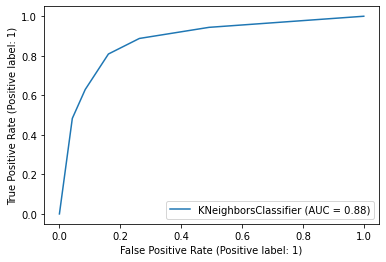

C:\Users\theda\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


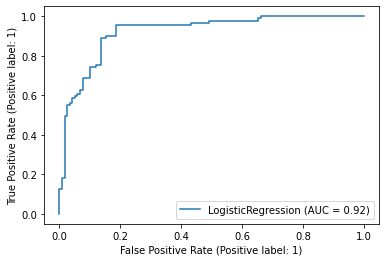

In [9]:
# ROC curve for kNN
metrics.plot_roc_curve(knn,X_test,y_test)
plt.show()

# ROC curve for Logistic Model
metrics.plot_roc_curve(lr_model,X_test,y_test)
plt.show()

>**Decision Point:**<br>
AUC is highest for our Logistic Model (0.92) vs. KNN (0.88) so I will use that model to further evaluate probability thresholds and corresponding performance measures

In [10]:
class_perf_measures(lr_model,X_test,y_test)

C:\Users\theda\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,threshold,TP,TN,FP,FN,Precision,Recall,F1,Accuracy
0,0.00,89,0,118,0,0.43,1.00,0.60,0.43
1,0.10,85,72,46,4,0.65,0.95,0.77,0.76
2,0.20,85,94,24,4,0.78,0.95,0.86,0.86
3,0.30,80,97,21,9,0.79,0.90,0.84,0.86
4,0.40,78,102,16,11,0.83,0.88,0.85,0.87
5,0.50,75,102,16,14,0.82,0.84,0.83,0.86
6,0.60,67,103,15,22,0.82,0.75,0.78,0.82
7,0.70,61,108,10,28,0.86,0.69,0.76,0.82
8,0.80,52,112,6,37,0.90,0.58,0.71,0.79
9,0.90,36,116,2,53,0.95,0.40,0.57,0.73


For this problem statement, **false positives** would be detrimental to the business. This is because, if we predict that an applicant should be **approved when they shouldn't be**, it is a major risk to the bank. However, if we predict that an applicant should **not be approved when they should be**, it does not pose any risk to the bank. Hence, we focus on **Precision**

1. **Prob Threshold = 0.2**:
    - False positives are relatively high (24), while we have 4 false negatives.
    - Precision is 0.78. Recall is 0.95
    - Accuracy is 86%, which is good.
    - F1 score is 0.86
    - Considering that false positives are worse for the business than false negatives (as explained above), we should check other probability thresholds to see if false positives can be minimized further (precision maximized)
<br><br>
2. **Prob Threshold = 0.6**:
    - With this threshold, the false positives have now reduced to 15. False negatives have increased to 22
    - The Precision has increased to 0.82. Recall has dropped to 0.75
    - F1 score has dropped to 0.78
    - Accuracy has dropped to 82%, which is still good.
    - This is better than the threshold of 0.2, considering that the Precision has increased. This is better for the business
    - We shall check one more probability threshold to confirm we can get a higher Precision (considering it is a bank dealing with large sums of money, I would say a Precision of at least 0.9 would bring the least risk to the bank)
<br><br>
3. **Prob Threshold = 0.8**:
    - With this threshold, we observe that while the Precision has increased to 0.9 (which is good), the Recall has fallen to 0.58
    - False negatives have increased to 37. False positives have reduced to 6
    - Accuracy has dropped to 79%
    - F1 score has dropped to 0.71
    - While this is better than threshold 0.2 and 0.6 (keeping Precision in mind), I wonder if we may have some angry customers who are being denied loans for no fault of theirs... I would say a threshold in between 0.6 and 0.8 would be the best.
<br><br>
4. **Which threshold to choose?**
    - We choose the threshold = 0.6, as this threshold displays the best performance measures:
        - While Precision is at 0.82 (which is not the highest), this threshold does strike a good balance between all performance measures (while focusing on Precision). We also avoid angry customers (which is also a sort of risk to the bank, but not as much as approving a loan when it shouldn't be)
        - Accuracy is good (82%)
        - F1 score is not the highest, but is balanced (considering we want to maximize Precision) (0.78)
        
     - While we have focused on the business requirement and tried to maximize Precision (thereby lower false positives and the overall risk to the bank), we must also consider that we shouldn't have too many customers being denied loans when they should have been approved (another type of risk).
         - Hence, at ths point I would probably interview the bank and understand where their focus lies. Depending on this I would revisit this probability threshold.
<br><br>

In [11]:
class_perf_measures(knn,X_test,y_test)

,threshold,TP,TN,FP,FN,Precision,Recall,F1,Accuracy
0,0.00,89,0,118,0,0.43,1.00,0.60,0.43
1,0.10,84,60,58,5,0.59,0.94,0.73,0.70
2,0.20,84,60,58,5,0.59,0.94,0.73,0.70
3,0.30,79,87,31,10,0.72,0.89,0.79,0.80
4,0.40,79,87,31,10,0.72,0.89,0.79,0.80
5,0.50,72,99,19,17,0.79,0.81,0.80,0.83
6,0.60,56,108,10,33,0.85,0.63,0.72,0.79
7,0.70,56,108,10,33,0.85,0.63,0.72,0.79
8,0.80,56,108,10,33,0.85,0.63,0.72,0.79
9,0.90,43,113,5,46,0.90,0.48,0.63,0.75


Just for reference, I output the performance measures of the KNN model.

# 5. Deployment of Model <a class="anchor" id="model-deployment"></a>

We now deploy our model so that the business can interact with it and start to make decisions (or evaluate it).

The steps are as follows:

- Pickle the model object so that it may be used by streamlit

- Create a streamlit app that allows the user to input the values as required by the model. Note - to allow for a simpler user experience, we can attempt to create a GUI that takes categorical variables in their ORIGINAL form, rather than their dummy form. We can easily convert this original form to dummy form in our code.

- **This has been completed for part 1 (system administrators)**


* [Go to Top](#table-of-content)